**HW3 - Adil Mert Ergörün**

Importing the data and a quick analysis

In [2]:
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Check the data

print(X_train.shape)
print(y_train.shape)

# Flatten the data for PCA Analysis

X_flattened = X_train.reshape(X_train.shape[0], -1)
print(X_flattened.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
(60000, 28, 28)
(60000,)
(60000, 784)


(60000, 28, 28)
(60000,)
(60000, 784)

**Part I: Code**

In [4]:
def pca(X):
    mean = []

    # Calculating it incrementaly to avoid overflows
    for i in range(X.shape[1]):
       curr_mean = 0
       for j in range(X.shape[0]):
          curr_mean += (X[j][i] - curr_mean) / (j + 1)
       mean.append(curr_mean)

    X_centered = X - mean

    U, S, Vt = np.linalg.svd(X_centered, full_matrices=False)

    weights = (S**2) / (X.shape[0] - 1)
    vectors = Vt.T

    return mean, weights, vectors


Results and Conclusions:

There is nothing to run in this part, thus there are no results.

Again, there is nothing to conclude from this part.

**Part II: Code**

PCA with 10 components explains 0.4909 of variance
PCA with 30 components explains 0.7384 of variance
PCA with 50 components explains 0.8353 of variance
PCA with 100 components explains 0.9261 of variance


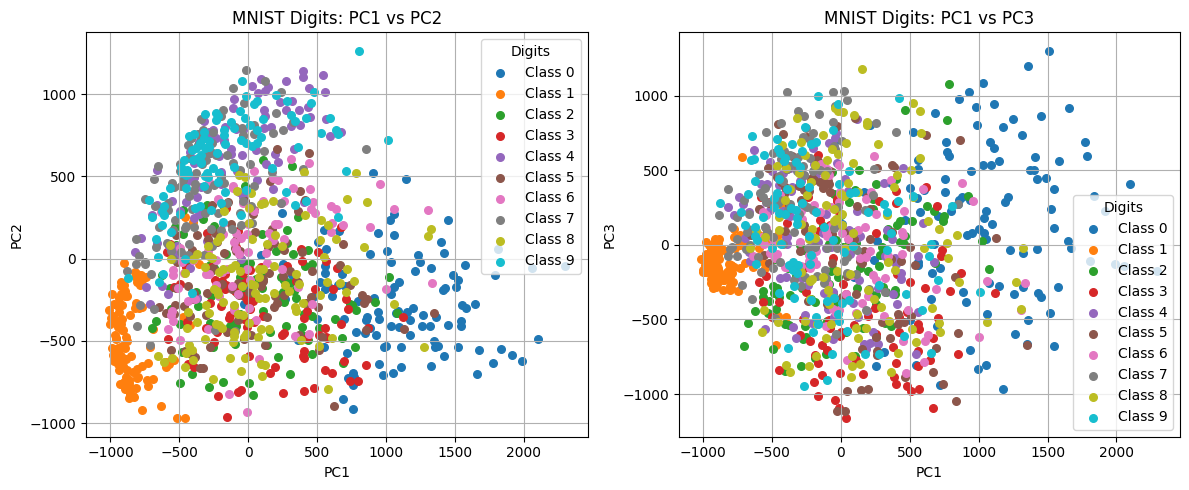

In [5]:
# Flatten the data
X_train_flat = X_flattened
X_test_flat = X_test.reshape(X_test.shape[0], -1)

np.random.seed(42)

# Select a random subset of 1000 images

indices = np.random.choice(X_train_flat.shape[0], size=1000, replace=False)
X_sub = X_train_flat[indices]
y_sub = y_train[indices]

n_components = [10, 30, 50, 100]

# Custom PCA projection function

def project_data(X, mean, vectors, component):
    X_centered = X - mean
    comp = vectors[:, :component]

    return np.dot(X_centered, comp)

pca_results = {}
pca_subsets = {}

mean, weights, vectors = pca(X_sub)

# Storing pca results for later use

pca_results['mean'] = mean
pca_results['weights'] = weights
pca_results['vectors'] = vectors

for n in n_components:
    X_projected = project_data(X_sub, mean, vectors, n)
    pca_subsets[n] = X_projected

    variance = weights[:n].sum() / weights.sum()
    print(f"PCA with {n} components explains {variance:.4f} of variance")

X_pca = pca_subsets[100]

plt.figure(figsize=(12, 5))

# Plot PC1 vs PC2
plt.subplot(1, 2, 1)
for i in range(10):
    mask = (y_sub == i)
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], label=f'Class {i}', s=30)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('MNIST Digits: PC1 vs PC2')
plt.legend(title="Digits")
plt.grid()

# Plot PC1 vs PC3
plt.subplot(1, 2, 2)
for i in range(10):
    mask = (y_sub == i)
    plt.scatter(X_pca[mask, 0], X_pca[mask, 2], label=f'Class {i}', s=30)

plt.xlabel('PC1')
plt.ylabel('PC3')
plt.title('MNIST Digits: PC1 vs PC3')
plt.legend(title="Digits")
plt.grid()

plt.tight_layout()
plt.show()

Random Forest Classification

In [ ]:
results = []

mean = pca_results['mean']
weights = pca_results['weights']

for n in n_components:
    X_train_pca = project_data(X_train_flat, mean, vectors, n)
    X_test_pca = project_data(X_test_flat, mean, vectors, n)

    rf = RandomForestClassifier(n_estimators=100, random_state=42)

    cv_scores = cross_val_score(rf, X_train_pca, y_train, cv=5, scoring='accuracy')

    rf.fit(X_train_pca, y_train)
    test_score = rf.score(X_test_pca, y_test)

    results.append({
        'n_components': n,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'test_accuracy': test_score
    })

    print(f"\nResults for {n} components:")
    print(f"Cross-validation accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
    print(f"Test accuracy: {test_score:.4f}")

    y_pred = rf.predict(X_test_pca)

    # Print classification report

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))


Results for 10 components:
Cross-validation accuracy: 0.9038 ± 0.0050
Test accuracy: 0.9075

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       980
           1       0.98      0.99      0.98      1135
           2       0.92      0.92      0.92      1032
           3       0.91      0.90      0.91      1010
           4       0.86      0.85      0.85       982
           5       0.90      0.90      0.90       892
           6       0.93      0.95      0.94       958
           7       0.94      0.90      0.92      1028
           8       0.88      0.87      0.88       974
           9       0.81      0.83      0.82      1009

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000


Results for 30 components:
Cross-validation accuracy: 0.9500 ± 0.0025
Test accuracy: 0.9558

Classification Report:
       

**Results:**

PCA with 10 components explains 0.4909 of variance


PCA with 30 components explains 0.7384 of variance


PCA with 50 components explains 0.8353 of variance


PCA with 100 components explains 0.9261 of variance


---

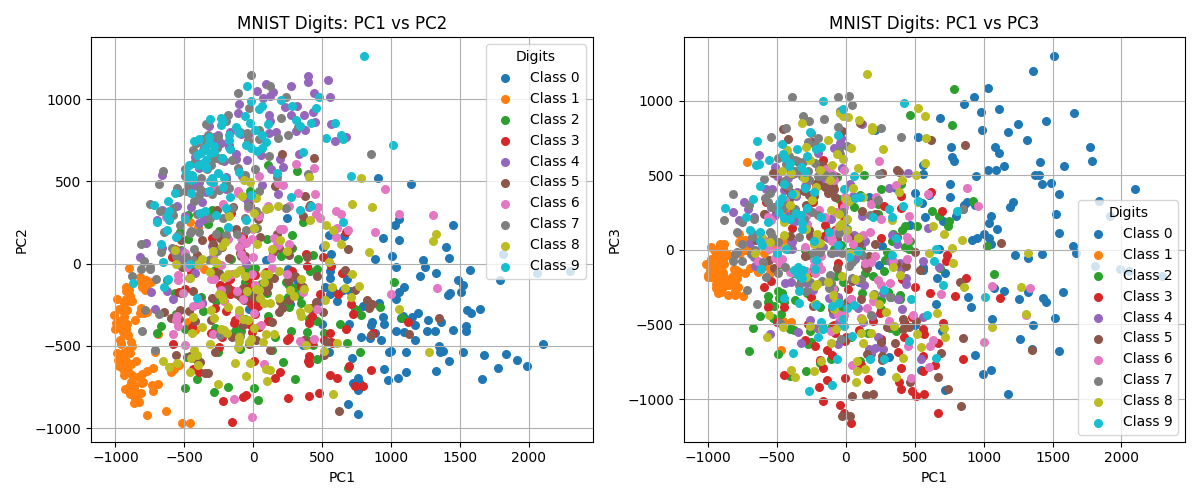

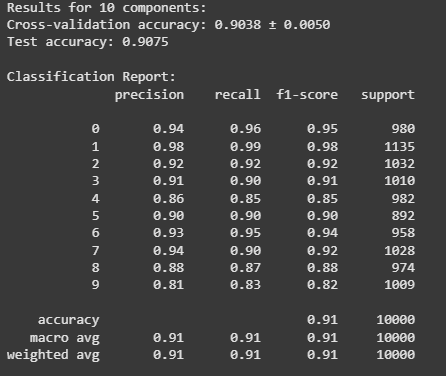

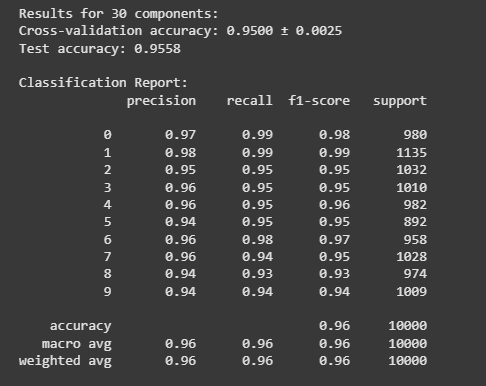

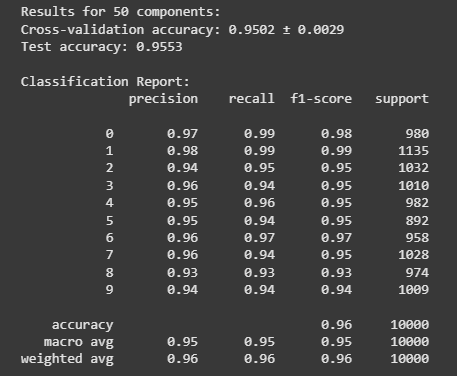

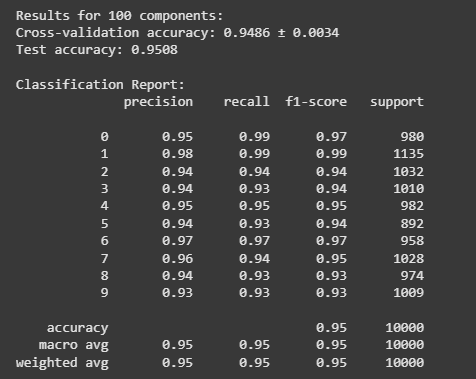

**Conclusinons**

As we can see from the PCA analysis, even with just a few components we can capture a lot of variance in the data. Only 10 components explained around 49% of the variance, this got up to 93% with 100 components. Which means we reduced the dimensions from 784 to something around 10-100.


While testing this PCA components with Random Forest algorithm, using 30 components gave the best accuracy at around 95%, using more components didn't improve, and even reduced the accuracy. Thus we can conclude that more information does not always mean better results.


The process with Random Forest took around 20 minutes to complete which was way longer than expected. Main reason being the cross-validation, because it had to train and test the model multiple times on a very large dataset.

As we can see from the results, 1 was the easiest to classify (97-98%) and 9 was the hardest (93-94%). This makes sense because 1 is the most unique among them and 9 can be misclassified with a lot of digits.


We can conclude that PCA worked great on our MNSIT dataset. It reduced the data without losing significant amount of information, thus we had good classification performance.